In [120]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [123]:
df = pd.read_csv('vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 1) Как критики относятся к спортивным играм?  


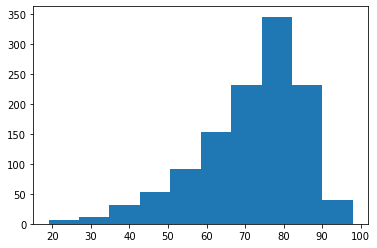

In [124]:
sport = df.loc[df.Genre=='Sports'].dropna(subset=['Critic_Score'])
plt.hist(sport['Critic_Score']);

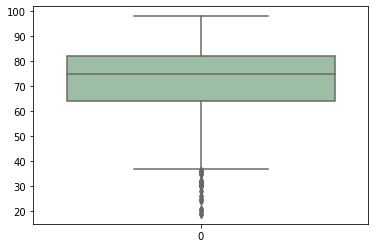

In [125]:
ax = sns.boxplot(data = [sport['Critic_Score']], color='#99c2a2');

In [127]:
# На основании визуализации выдвинем гипотезу, что критики ставят высокие оценки спортивным играм:
# Н0: Средняя оценка спортивных игр критиками не больше 70
# Н1: Средняя оценка спортивных игр критиками больше 70
# Примем уровень значимости 0.05
    
alpha = 0.05
result = stats.ttest_1samp(sport['Critic_Score'], 70, alternative='greater')
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, Средняя оценка спортивных игр критиками больше 70')
else:
    print('Не отвергаем нулевую гипотезу, Средняя оценка спортивных игр критиками не больше 70')

Ttest_1sampResult(statistic=4.900329475499578, pvalue=5.442744598708131e-07)
Отвергаем нулевую гипотезу, Средняя оценка спортивных игр критиками больше 70


In [ ]:
# 2) Критикам нравятся больше игры на PC или на PS4?  
  

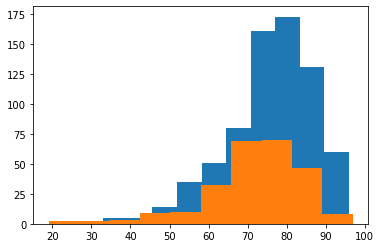

In [129]:
PC = df.loc[df.Platform=='PC'].dropna(subset=['Critic_Score'])
PS4 = df.loc[df.Platform=='PS4'].dropna(subset=['Critic_Score'])
plt.hist(PC['Critic_Score']);
plt.hist(PS4['Critic_Score']);

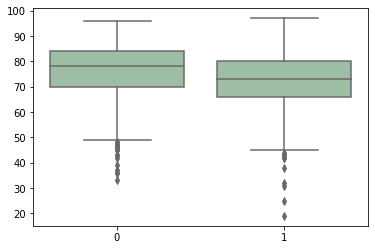

In [34]:
ax = sns.boxplot(data = [PC['Critic_Score'],PS4['Critic_Score']], color='#99c2a2');

In [131]:
# На основании визуализации выдвинем гипотезу, что критикам больше нравятся игры на PC:
# Н0: Средняя оценка игр на PC не выше средних оценок игр на PS4
# Н1: Средняя оценка игр на PC выше средних оценок игр на PS4
# Примем уровень значимости 0.05
alpha = 0.05
result = stats.ttest_ind(PC['Critic_Score'],PS4['Critic_Score'], equal_var=False, alternative='greater')
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, Средняя оценка игр на PC выше средних оценок игр на PS4')
else:
    print('Не отвергаем нулевую гипотезу, Средняя оценка игр на PC не выше средних оценок игр на PS4')

Ttest_indResult(statistic=4.3087588262138725, pvalue=1.0336245786417395e-05)
Отвергаем нулевую гипотезу, Средняя оценка игр на PC выше средних оценок игр на PS4


In [ ]:
# 3) Критикам больше нравятся стрелялки или стратегии?  


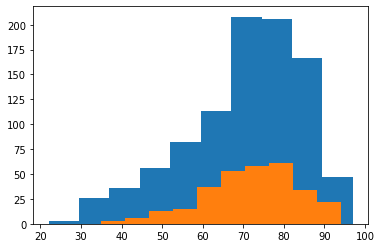

In [132]:
Shooter = df.loc[df.Genre=='Shooter'].dropna(subset=['Critic_Score'])
Strategy = df.loc[df.Genre=='Strategy'].dropna(subset=['Critic_Score'])
plt.hist(Shooter['Critic_Score']);
plt.hist(Strategy['Critic_Score']);

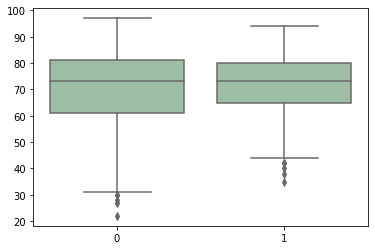

In [42]:
ax = sns.boxplot(data = [Shooter['Critic_Score'],Strategy['Critic_Score']], color='#99c2a2');

In [133]:
# На основании визуализации не вполне очевидно, какие игры нравятся больше. Попробуем гипотезы:
# Н0: Средняя оценка стрелялок не выше средних оценок игр стратегий
# Н1: Средняя оценка стрелялок выше средних оценок игр стратегий
# Примем уровень значимости 0.05
alpha = 0.05
result = stats.ttest_ind(Shooter['Critic_Score'],Strategy['Critic_Score'], equal_var=False, alternative='greater')
print(result)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, Средняя оценка стрелялок выше средних оценок игр стратегий')
else:
    print('Не отвергаем нулевую гипотезу, Средняя оценка стрелялок не выше средних оценок игр стратегий')

Ttest_indResult(statistic=-2.2972408230640315, pvalue=0.9890305052388476)
Не отвергаем нулевую гипотезу, Средняя оценка стрелялок не выше средних оценок игр стратегий


In [134]:
df = pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [135]:
# приведем все слова к нижнему регистру в новой колонке
df['Message_upd'] = df.Message.str.lower()
df.head()

,Category,Message,Message_upd
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


In [136]:
# уберем символы
df['Message_upd'] = df.Message_upd.str.replace('[\W_]+',' ')
df.head()

,Category,Message,Message_upd
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


In [137]:
# удалим стоп-слова
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))
df['Message_upd'] = df['Message_upd'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_set)]))
df.head()

,Category,Message,Message_upd
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [139]:
# приведем слова к лемме
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
df['Message_upd'] = df['Message_upd'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x.split()])) 
df.head()

,Category,Message,Message_upd
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [140]:
# Преобразуем все сообщения в вектора TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message_upd)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
#Разделим на тестовые и тренировочные данные
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['Category'], test_size=0.3, random_state=42)

In [144]:
#Импортируем логистическую регрессию
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)

In [145]:
#Обучаем модель
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [147]:
#Строим прогноз
y_pred = lr.predict(X_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [148]:
#Оценим точность
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.958732057416268

In [149]:
#Строим confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[1445,    3],
       [  66,  158]], dtype=int64)

In [158]:
#Выберем только неверные предсказания
new_df = pd.DataFrame(y_test)
new_df['Predicted'] = y_pred
new_df
predicted = new_df.loc[new_df.Category!=new_df.Predicted].drop('Category', axis=1)
predicted

,Predicted
2952,spam
881,ham
1961,ham
3864,ham
2575,ham
...,...
4543,ham
752,ham
309,ham
495,spam


In [159]:
#Подтянем к неверным предсказаниям текст исходных сообщений
predicted.merge(df, left_index=True, right_index=True).drop('Message_upd', axis=1)
    

,Predicted,Category,Message
2952,spam,ham,Hey now am free you can call me.
881,ham,spam,Reminder: You have not downloaded the content ...
1961,ham,spam,Guess what! Somebody you know secretly fancies...
3864,ham,spam,Oh my god! I've found your number again! I'm s...
2575,ham,spam,Your next amazing xxx PICSFREE1 video will be ...
...,...,...,...
4543,ham,spam,FreeMsg Hi baby wow just got a new cam moby. W...
752,ham,spam,You have an important customer service announc...
309,ham,spam,TheMob> Check out our newest selection of cont...
495,spam,ham,Are you free now?can i call now?
